In [ ]:
from google.colab import drive
drive.mount('gdrive')
%cd /content/gdrive/'My Drive'/Dataset/Assignment3

Mounted at gdrive
/content/gdrive/My Drive/Dataset/Assignment3


In [ ]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import seaborn as sn

In [ ]:
test = sio.loadmat('dataset_b.mat')
test.keys()

dict_keys(['__header__', '__version__', '__globals__', 'samples', 'labels'])

In [ ]:
print(type(test))
for i in test:
  print(i)
header = test['__header__']
data = test['samples']
labels = test['labels']
print(header)
print(data.ndim)
print(data.shape)
print(labels.ndim)
print(labels.shape)
# for i in var2:
#   print(i)

<class 'dict'>
__header__
__version__
__globals__
samples
labels
b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Oct 29 10:42:25 2020'
2
(10000, 2)
2
(1, 10000)


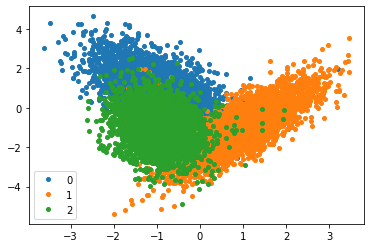

In [ ]:
#to plot
xaxis = []
yaxis = []
for x in data:
  xaxis.append(x[0])
  yaxis.append(x[1])

df = pd.DataFrame(dict(x=xaxis, y=yaxis, label=labels[0]))
groups = df.groupby('label')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=4, label=name)
ax.legend()
plt.show()

In [ ]:
def traintestsplit(df):
  shuffle = np.random.permutation(len(df))
  test_size = int(len(df) * 0.2)
  set1 = shuffle[:test_size]
  set2 = shuffle[test_size:test_size*2]
  set3 = shuffle[test_size*2:test_size*3]
  set4 = shuffle[test_size*3:test_size*4]
  set5 = shuffle[test_size*4:]
  dataset1 = df.iloc[set1]
  dataset2 = df.iloc[set2]
  dataset3 = df.iloc[set3]
  dataset4 = df.iloc[set4]
  dataset5 = df.iloc[set5]
  return [dataset1, dataset2, dataset3, dataset4, dataset5]

In [ ]:
data = traintestsplit(df)
for i in range(5):
  data[i] = data[i].reset_index()
  data[i] = data[i].drop(columns=['index'])